## This is the Jupyter notebook with python code to load in the preprocessed response time data, to create the figures in the manuscript, and to create a .csv file for further statistical analysis in MATLAB. 

#BSD-3 License

### import necessary packages

In [70]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline

In [71]:
### decide whether or not to save figures and data for MATLAB

saveFig = False
saveMat = False

In [72]:
### import the .mat data files


mat1 = loadmat('822e26_compareResponse_block_1_changePts_noDelay',squeeze_me=1)
mat2 = loadmat('822e26_compareResponse_block_2_changePts_noDelay',squeeze_me=1)

In [73]:
### extract variables of interest
### respLo = the minimum response time
### respHi = the maximum response time

respLo = 150 # minimum response time - 150 ms
respHi = 1000 # maximum response time - 1000 ms

button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']


In [74]:
### prepare for pandas data frame


a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}


In [75]:
### make pandas dataframes


dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
#dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')
dataFdict2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ndata2.items() ]))

In [76]:
### assign columns for dataframes


dataFdict1.columns = ['Haptic','Null','2 @ 5.4 mA','1.8 mA Match Intensity','1.47 mA Threshold','1.61 mA','2 @ 5.4, 38 @ 1.47 mA','2 @ 5.4 mA, 38 @ 1.8 mA']
dataFdict2.columns = ['Haptic','Null','2 @ 3.75 mA','2.0 mA Match Intensity','1.6 mA Threshold','1.79 mA','2 @ 6 mA, 38 @ 1.6 mA','2 @ 6. mA, 38 @ 2 mA']


dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = 'a1355e'
dataMelt1['Subject'] = '1'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = 'a1355e'
dataMelt2['Subject'] = '1'
dataMelt2['block'] = '2'
dataMelt1.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)


In [77]:
dataMelt1.groupby(['Experiment']).describe().round()


Response Time (ms)                                 \
                                     count    mean    std     min     25%   
Experiment                                                                  
1.47 mA Threshold                      1.0  2092.0    NaN  2092.0  2092.0   
1.61 mA                                0.0     NaN    NaN     NaN     NaN   
1.8 mA Match Intensity                 1.0   306.0    NaN   306.0   306.0   
2 @ 5.4 mA                            20.0   273.0   79.0   210.0   223.0   
2 @ 5.4 mA, 38 @ 1.8 mA               20.0   338.0   80.0   219.0   292.0   
2 @ 5.4, 38 @ 1.47 mA                 20.0   327.0   55.0   257.0   293.0   
Haptic                                16.0   267.0  164.0   161.0   190.0   
Null                                   0.0     NaN    NaN     NaN     NaN   

                                                 
                            50%     75%     max  
Experiment                                       
1.47 mA Threshold        2092.0  2092.0  2092.0  
1.61 mA                     NaN     NaN     NaN  
1.8 mA Match Intensity    306.0   306.0   306.0  
2 @ 5.4 mA                244.0   287.0   532.0  
2 @ 5.4 mA, 38 @ 1.8 mA   318.0   366.0   505.0  
2 @ 5.4, 38 @ 1.47 mA     313.0   343.0   485.0  
Haptic                    209.0   247.0   705.0  
Null                        NaN     NaN     NaN

In [83]:
### concatenate

frames = [dataMelt1,dataMelt2]

result = pd.concat(frames)
result
resultTrim = result[(result['Response Time (ms)'] < respHi) & (result['Response Time (ms)'] > respLo)]
resultTrim.groupby(['Experiment','Subject','block']).median()

,,,Response Time (ms)
Experiment,Subject,block,
1.6 mA Threshold,1,2,179.48672
1.79 mA,1,2,435.81440
1.8 mA Match Intensity,1,1,306.09408
2 @ 3.75 mA,1,2,522.89536
2 @ 5.4 mA,1,1,244.26496
"2 @ 5.4 mA, 38 @ 1.8 mA",1,1,317.84960
"2 @ 5.4, 38 @ 1.47 mA",1,1,312.79104
"2 @ 6 mA, 38 @ 1.6 mA",1,2,396.75904
"2 @ 6. mA, 38 @ 2 mA",1,2,373.84192


In [85]:
experimentsOfInt =  ['Haptic','2 @ 5.4 mA','1.8 mA Match Intensity','1.47 mA Threshold','1.61 mA','2 @ 5.4, 38 @ 1.47 mA','2 @ 5.4 mA, 38 @ 1.8 mA',
                    '2 @ 3.75 mA','2.0 mA Match Intensity','1.6 mA Threshold','1.79 mA','2 @ 6 mA, 38 @ 1.6 mA','2 @ 6. mA, 38 @ 2 mA']

In [86]:
### look at various metrics of interest


dataCleaned = resultTrim[resultTrim['Experiment'].isin(experimentsOfInt)]
dataCleaned.groupby(['Experiment','Subject','block']).mean()
dataCleaned.groupby(['block','Experiment','Subject']).describe()
#dataCleaned.groupby(['Subject','experiment']).describe().round()

#dataCleaned.groupby(['Subject','experiment']).mean()
#dataCleaned.groupby(['Subject','experiment']).std()

# get counts of each type
#dataCleaned.groupby(['Subject','experiment']).count()

Response Time (ms)              \
                                                   count        mean   
block Experiment              Subject                                  
1     1.8 mA Match Intensity  1                      1.0  306.094080   
      2 @ 5.4 mA              1                     20.0  273.285120   
      2 @ 5.4 mA, 38 @ 1.8 mA 1                     20.0  337.764352   
      2 @ 5.4, 38 @ 1.47 mA   1                     20.0  326.950912   
      Haptic                  1                     16.0  267.169280   
2     1.6 mA Threshold        1                      1.0  179.486720   
      1.79 mA                 1                      5.0  503.971840   
      2 @ 3.75 mA             1                      9.0  543.953351   
      2 @ 6 mA, 38 @ 1.6 mA   1                     20.0  391.079936   
      2 @ 6. mA, 38 @ 2 mA    1                     20.0  392.828928   
      2.0 mA Match Intensity  1                     18.0  493.456498   
      Haptic                  1                     18.0  236.926293   

                                                                         \
                                              std        min        25%   
block Experiment              Subject                                     
1     1.8 mA Match Intensity  1               NaN  306.09408  306.09408   
      2 @ 5.4 mA              1         79.101060  210.04288  223.29344   
      2 @ 5.4 mA, 38 @ 1.8 mA 1         80.161654  219.17696  292.03456   
      2 @ 5.4, 38 @ 1.47 mA   1         55.010388  257.47456  293.36576   
      Haptic                  1        164.446931  160.93184  190.34112   
2     1.6 mA Threshold        1               NaN  179.48672  179.48672   
      1.79 mA                 1        185.446480  355.04128  404.93056   
      2 @ 3.75 mA             1        189.150777  240.72192  400.22016   
      2 @ 6 mA, 38 @ 1.6 mA   1        116.346834  175.34976  288.86016   
      2 @ 6. mA, 38 @ 2 mA    1        111.549349  202.99776  320.36864   
      2.0 mA Match Intensity  1        225.805996  299.86816  319.31392   
      Haptic                  1         89.459558  169.00096  197.62176   

                                                                        
                                             50%        75%        max  
block Experiment              Subject                                   
1     1.8 mA Match Intensity  1        306.09408  306.09408  306.09408  
      2 @ 5.4 mA              1        244.26496  287.48800  532.31616  
      2 @ 5.4 mA, 38 @ 1.8 mA 1        317.84960  366.33600  505.32352  
      2 @ 5.4, 38 @ 1.47 mA   1        312.79104  343.04000  485.41696  
      Haptic                  1        208.97792  246.65088  705.41312  
2     1.6 mA Threshold        1        179.48672  179.48672  179.48672  
      1.79 mA                 1        435.81440  502.41536  821.65760  
      2 @ 3.75 mA             1        522.89536  663.38816  832.14336  
      2 @ 6 mA, 38 @ 1.6 mA   1        396.75904  454.78912  632.54528  
      2 @ 6. mA, 38 @ 2 mA    1        373.84192  485.89824  560.45568  
      2.0 mA Match Intensity  1        364.09344  565.20704  938.68032  
      Haptic                  1        215.08096  240.19968  575.61088

In [87]:
typeOrderSort= ['Haptic','2 @ 5.4 mA','1.8 mA - Match Intensity','1.47 mA Threshold','1.61 mA','2 @ 5.4, 38 @ 1.47 mA','2 @ 5.4 mA, 38 @ 1.8 mA','2 @ 3.75 mA','2.0 mA Match Intensity','1.6 mA Threshold','1.79 mA','2 @ 6 mA, 38 @ 1.6 mA','2 @ 6. mA, 38 @ 2 mA']
dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.Experiment.isin(typeOrderSort))

dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.Experiment.isin(typeOrderSort),other='1')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.Experiment.isin(typeOrderSort),other='0') 

dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.Experiment.isin(typeOrderSort))


#dataCleaned[dataCleaned['experiment'] == '2 @ 3000 uA, 38 @ 1250 uA']

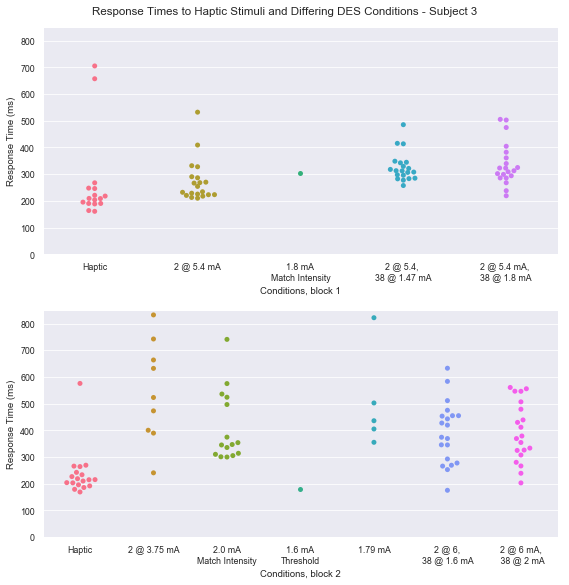

In [92]:
fig = plt.figure(figsize=(8,8))
ax2 = plt.subplot2grid((2, 3), (0, 0), colspan=3)
sns.set_context("paper")

#frameIndividual = sns.FacetGrid(data=dataCleaned,row='block',height=4, aspect=3,sharex=False,sharey=True)
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

sns.swarmplot('Experiment',"Response Time (ms)",data=dataCleaned[dataCleaned.block == '1'],palette='husl')

ax3 = plt.subplot2grid((2, 3), (1,0 ), colspan=3)
sns.swarmplot('Experiment',"Response Time (ms)",data=dataCleaned[dataCleaned.block == '2'],palette='husl')

ax2.set_xlabel('Conditions, block 1')
ax3.set_xlabel('Conditions, block 2')
ax2.set_title('')
ax3.set_title('')

figIndividual = plt.gcf()

ttl = fig.suptitle('Response Times to Haptic Stimuli and Differing DES Conditions - Subject 3') # can also get the figure from plt.gcf()
ttl.set_position([.5, 1.01])

xlab1 = ['Haptic','2 @ 5.4 mA','1.8 mA','2 @ 5.4, ','2 @ 5.4 mA, ']
xlab2 = ['','','Match Intensity','38 @ 1.47 mA','38 @ 1.8 mA']
xlabels = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab1,xlab2)]

ax2.set_xticklabels(xlabels)
xlab12 = ['Haptic','2 @ 3.75 mA','2.0 mA','1.6 mA','1.79 mA','2 @ 6,','2 @ 6 mA,']
xlab22 = ['','','Match Intensity','Threshold','','38 @ 1.6 mA',' 38 @ 2 mA']
xlabels2 = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab12,xlab22)]
ax3.set_xticklabels(xlabels2)

ax3.set_ylim([0,850])
ax2.set_ylim([0,850])

plt.tight_layout()

saveFig = 1
if saveFig:
    figIndividual.savefig('822e26_priming_RT_CP_paper.svg', dpi=600,bbox_inches='tight')
    figIndividual.savefig('822e26_priming_RT_CP_paper.png', dpi=600,bbox_inches='tight')
    figIndividual.savefig('822e26_priming_RT_CP_paper.eps', dpi=600,bbox_inches='tight')

In [94]:
dataCleaned.to_csv('822e26_priming.csv',index=False)
